# SC1015 DSAI Project:
### [Toxic Comment Classification Challenge Dataset from Kaggle](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview)

In [2]:
## Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
from textblob import TextBlob,Word
from matplotlib.ticker import PercentFormatter

## Setup : Import the Dataset
The dataset `train.csv` is in CSV format, hence we use the `read_csv` function from Pandas, and take a quick look at the data using the head function.

In [3]:
df = pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Entries with all 0 under the 6 categories are considered as non-toxic.</br> 

In [4]:
# Check the shape of object type in the dataset using the .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


## Data Cleaning

check null value in dataset, need to clean dataset if there is missing values

In [5]:
#find the null values of the df
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'

In [6]:
import re
import string

# Remove all '\n' in the string and replace it with a space
rm_breakline = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
rm_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['comment_text'] = df['comment_text'].map(rm_breakline).map(rm_non_ascii)

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


make sure columns: toxic, severe_toxic, obscene, threat, insult, and identity_hate have no other value other than 0 and 1

In [39]:
print("Max Value")
#find the max value to every column
print(df[df.columns[2:]].max())
print("\nMin Value")
#find the min value to every column
print(df[df.columns[2:]].min())
#find the distinct value of every column
print("\nDistinct Value of all column")
print(pd.unique(df[df.columns[2:]].values.ravel()))

Max Value
toxic                   1
severe_toxic            1
obscene                 1
threat                  1
insult                  1
identity_hate           1
sentiment        Positive
dtype: object

Min Value
toxic                   0
severe_toxic            0
obscene                 0
threat                  0
insult                  0
identity_hate           0
sentiment        Negative
dtype: object

Distinct Value of all column
[0 'Neutral' 'Positive' 1 'Negative']


## Exploratory Data Analysis

comparing the percentage and total number of comments categorized as toxic, severe_toxic, obscene, threat, insult, and identity_hate to those of normal comments

In [8]:
from textblob import TextBlob,Word

In [53]:
df[2:8]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sentiment
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Negative
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0,Negative
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,Negative
5,00025465d4725e87,""" Congratulations from me as well, use the to...",0,0,0,0,0,0,Negative
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,Negative
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,Negative


In [63]:
def polarity(x):
    if TextBlob(x).sentiment[0] > 0.25:
        return 'Positive'
    else:
        return 'Neutral'

def sentiment(x):
    cols_to_check = df.columns[2:8]
    if any(df.loc[x.name, cols_to_check] == 1):
        return 'Negative'
    else:
        return polarity(x['comment_text'])

In [64]:
df['sentiment'] = df.apply(sentiment, axis=1)

In [65]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sentiment
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,Neutral
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,Positive
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Neutral
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0,Neutral
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,Neutral
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,Neutral
159567,ffea4adeee384e90,You should be ashamed of yourself That is a ...,0,0,0,0,0,0,Neutral
159568,ffee36eab5c267c9,"Spitzer Umm, theres no actual article for pr...",0,0,0,0,0,0,Neutral
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,Neutral


In [97]:
count = df['sentiment'].value_counts()
perc = df['sentiment'].value_counts(normalize=True)
pd.DataFrame({'counts': count, 'percentages': perc})

,counts,percentages
Neutral,118597,0.743224
Positive,24749,0.155097
Negative,16225,0.101679


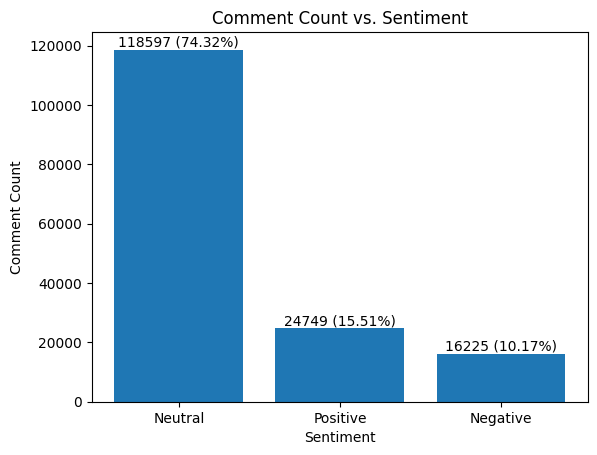

In [67]:
# sample data
categories = df['sentiment'].unique().tolist()
values = df['sentiment'].value_counts().tolist()

# calculate percentages
total = sum(values)
percentages = [(value / total) * 100 for value in values]

# plot the bar graph
fig, ax = plt.subplots()
ax.bar(categories, values)
ax.set_title('Comment Count vs. Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Comment Count')

# add percentages as annotations above each bar
for i, value in enumerate(values):
    ax.annotate(f'{value} ({percentages[i]:.2f}%)', xy=(i, value), ha='center', va='bottom')

plt.show()

In [75]:
df.columns[2:8]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [82]:
#number of rows that have 1 in more that 1 category eg. comment id:0002bcb3da6cb337 under toxic,severe toxic,obscene,insult
len(df[(df.iloc[:, 2:8] == 1).sum(axis=1) > 1])

9865

In [102]:
count = df[df.columns[2:-1]].sum()
perc = df[df.columns[2:-1]].sum()/len(df[df['sentiment']=='Negative'])
pd.DataFrame({'counts': count, 'percentages': perc})

,counts,percentages
toxic,15294,0.942619
severe_toxic,1595,0.098305
obscene,8449,0.520740
threat,478,0.029461
insult,7877,0.485485
identity_hate,1405,0.086595


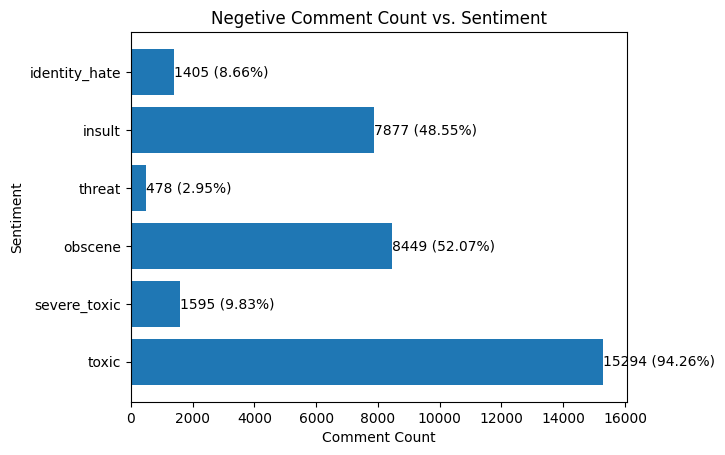

1/1 [==============================] - 1s 595ms/step


Traceback (most recent call last):
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/gradio/routes.py", line 393, in run_predict
    output = await app.get_blocks().process_api(
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/gradio/blocks.py", line 1059, in process_api
    result = await self.call_function(
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/gradio/blocks.py", line 868, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 86

1/1 [==============================] - 0s 46ms/step


Traceback (most recent call last):
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/gradio/routes.py", line 393, in run_predict
    output = await app.get_blocks().process_api(
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/gradio/blocks.py", line 1059, in process_api
    result = await self.call_function(
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/gradio/blocks.py", line 868, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 86

In [155]:
# sample data
categories = df.columns[2:-1].tolist()
values = df[df.columns[2:-1]].sum().tolist()

# calculate percentages
total = len(df[df['sentiment']=='Negative'])
percentages = [(value / total) * 100 for value in values]

# plot the horizontal bar graph
fig, ax = plt.subplots()
ax.barh(categories, values)
ax.set_title('Negetive Comment Count vs. Sentiment')
ax.set_xlabel('Comment Count')
ax.set_ylabel('Sentiment')

# add percentages as annotations to the right of each bar
for i, value in enumerate(values):
    ax.annotate(f'{value} ({percentages[i]:.2f}%)', xy=(value, i), ha='left', va='center')

plt.show()

Split dataset into 6 categories: toxic, severe_toxic, obscene, threat, insult, and identity_hate. df_category stucture = {id,comment,categotry}

In [107]:
df_toxic = df.loc[:,['id','comment_text','toxic']]
df_severe = df.loc[:,['id','comment_text','severe_toxic']]
df_obscene = df.loc[:,['id','comment_text','obscene']]
df_threat = df.loc[:,['id','comment_text','threat']]
df_insult = df.loc[:,['id','comment_text','insult']]
df_hate = df.loc[:,['id','comment_text','identity_hate']]

#### Creating WordCloud<br>
show frequently used words in each category

In [108]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [109]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

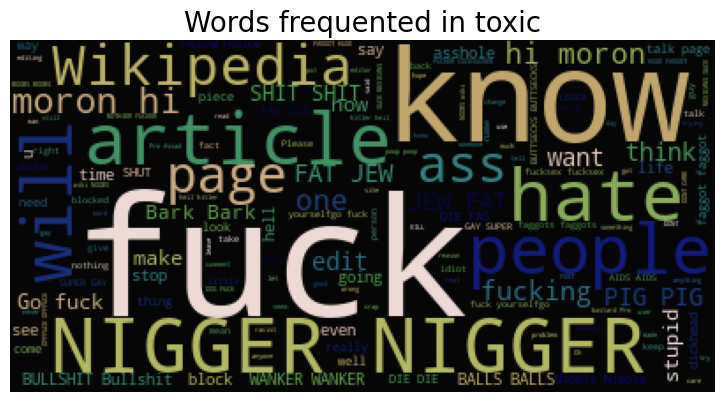

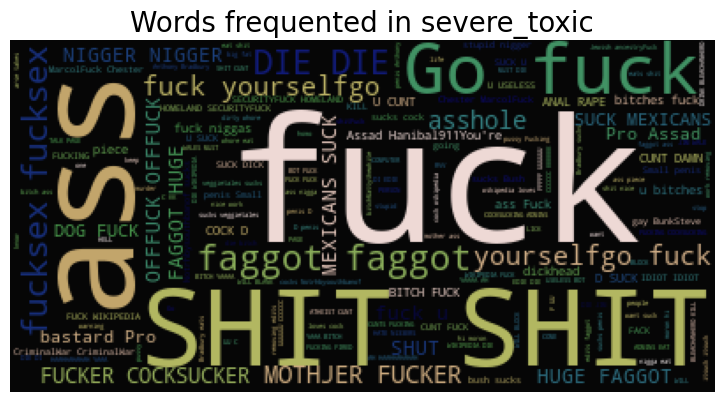

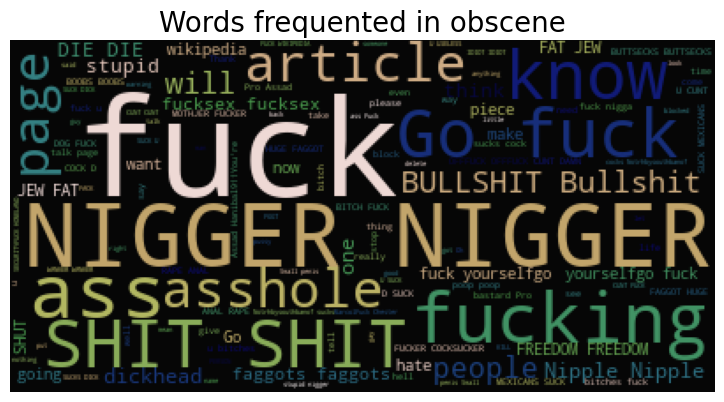

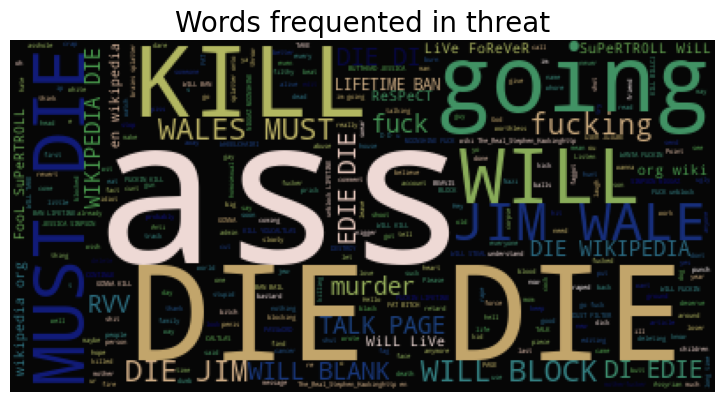

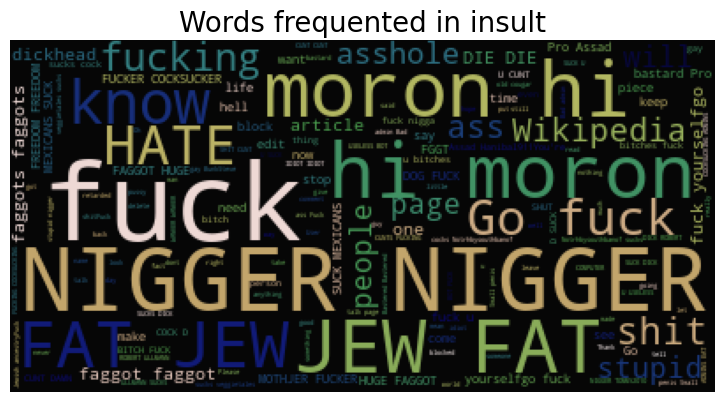

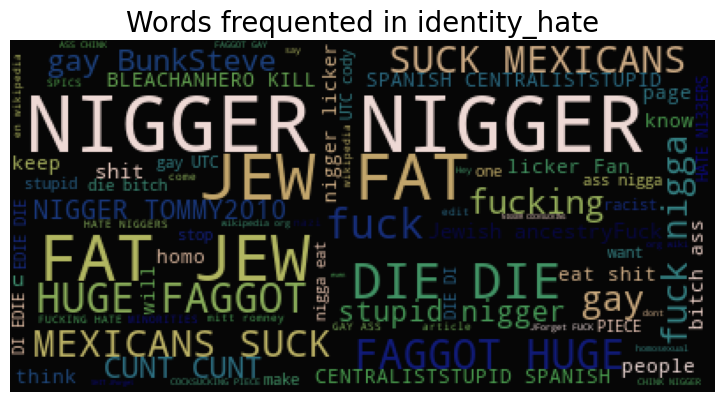

In [110]:
category_df=[df_toxic,df_severe,df_obscene,df_threat,df_insult,df_hate]

for i in range(len(category_df)):
    wordcloud(category_df[i],category_df[i].columns[2])

### create ML pipeline

In [119]:
from tensorflow.keras.layers import TextVectorization

In [126]:
X = df['comment_text']
y = df[df.columns[2:8]].values

In [127]:
MAX_FEATURES = 200000 # number of words in the vocab

In [128]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [129]:
vectorizer.adapt(X.values)

In [130]:
vectorized_text = vectorizer(X.values)

In [131]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [132]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

### Create Sequential Model

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [134]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [135]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

Train Model

In [161]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [162]:
history = model.fit(train, epochs=1, validation_data=val)

  89/6981 [..............................] - ETA: 33:39 - loss: 0.0185 - accuracy: 0.9824

<Figure size 800x500 with 0 Axes>

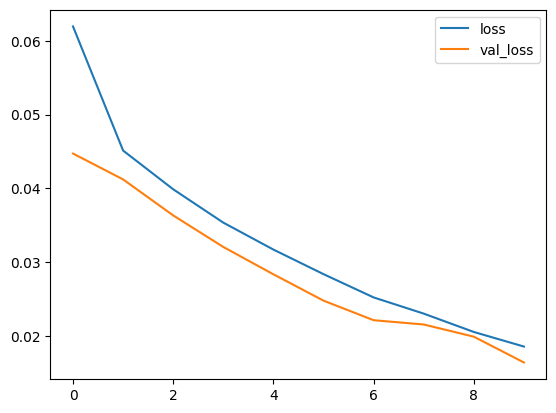

In [80]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## Make Predictions

In [137]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [138]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 396ms/step


In [139]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',
       'sentiment'],
      dtype='object')

In [140]:
(res > 0.5).astype(int)

array([[1, 1, 0, 1, 0, 1]])

In [141]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [142]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 50ms/step


array([[1, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1]])

In [143]:
res.shape

(1, 6)

## Evaluate Model

In [144]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [145]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [146]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 49ms/step


In [148]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.03246362879872322, Recall:0.6048910021781921, Accuracy:0.0


In [111]:
%pip install gradio jinja2

Note: you may need to restart the kernel to use updated packages.


In [152]:
import gradio as gr

/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [104]:
#model.save('toxicity.h5')

In [156]:
model = tf.keras.models.load_model('toxicity.h5')

In [158]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [159]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Users/xueer/miniforge3/envs/NTU-Python/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [160]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://23892eff18f6c453a8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
